# A guideline for future remote employees

Working from home or remotely is on the rise - across all industries. With better, cheaper and more reliable digital communication technologies, many activities can be done from anywhere in the world. Everybody knows for himself, where he can work most efficiently: This place could be at home, in the coworking space around the block or at a peaceful spot in nature.

Especially jobs related to information technology like system administration, software development or data science can be perfectly done without an office building. The work is done using a computer anyway, secure access to data and systems can be realized using modern IT security techniques and communication with colleagues as well as business meetings can be realized using appropriate software.

Despite concerns about remote work, like reduced organizational affiliation, reduced personal contact with colleagues and challenes related to digial meetings, the trend towards remote work with all its benefits is likely to further accelerate in the future.

The benefits for both emplooye and employer are overwhelming: Employees can save a lot of time they usually spend in traffic jams as well as costs for fuel or train tickets. Additionally, employees can work more flexible and can structure their day based on their own individual needs or responsibilities: For example, a father could prepare lunch for the children before they come home from school. Somewhere else, a young woman can easily practice some Yoga between her business meetings to sharpen her focus.

But remote work is not only a big advantage for employees -  also companies can benefit from a remote workforce: First, there is no need anymore for expensive office buildings including costs for heating, electricity, cleaning, office furniture etc. Moreover, happier employees with a good work-life-balance are more productive and do not waste time on stupid tasks to fill out the time at work. The trust provided by the company will be reciprocated by increasingly loyal employees who want the best for the company to further improve this win-win situation.

Especially in areas where much creativity is needed, the benefits of flexible remote work take an even larger effect.

After pinpointing the benefits of remote work, we want to analyse a given dataset according to information about remote work. This data comes from Stackoverflow a survey and contains various information is about its user and their profession in general - not about remote work specifically. Anyway, we can extract the relevant information for our purpose and find meaningful insights about remote work.

# Structure using the CRISP-DM framework
This document will use the CRIPS-DM framework to analyze the previously mentioned dataset regarding questions about remote work. CRISP-DM is a industrial standard for Data Science projects, which divides the whole project into six smaller phases. These phases can be used as a guideline for organization and implementing any data science related project. All the phases are going to be explained shortly while we perform the necessary operations to the data.

## I. Business Understanding
First, we need to understand the objectives of the project and the questions we want to answer. Before we define these questions, we take a look to get a basic understanding of the available data.

In [1]:
import os
import pandas as pd
import seaborn as sns
#import matplotlib as plt
sns.set_theme(style="whitegrid")

In [2]:
# Define the data paths and load the data as Pandas dataframes
results_public_path = "./data/survey-results-public.csv"
results_schema_path = "./data/survey-results-schema.csv"

df_public = pd.read_csv(results_public_path)
df_schema = pd.read_csv(results_schema_path)

In [3]:
df_public.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df_schema.head()

,Column,Question
0,Respondent,Respondent ID number
1,Professional,Which of the following best describes you?
2,ProgramHobby,Do you program as a hobby or contribute to ope...
3,Country,In which country do you currently live?
4,University,"Are you currently enrolled in a formal, degree..."


As we can see, the first csv-file contains the results from a survey among Stackoverflow users. The second csv-file contains an explanation for all the provided columns. Each column represents a question in the questionnaire.

After looking at the questions manually, we examined that the following questions from the survey are directly related to remote work:

- EmploymentStatus - Which of the following best describes your current employment status?
- HomeRemote - How often do you work from home or remotely?
- YearsProgram - How long has it been since you first learned how to program?
- YearsCodedJob - For how many years have you coded as part of your job?
- YearsCodedJobPast - For how many years did you code as part of your job?
- AssessJobRemote - When you're assessing potential jobs to apply to, how important are each of the following to you? The opportunity to work from home/remotely
- CollaborateRemote - It's harder to collaborate with remote peers than those on site


We formulate a case study to have a common thread for all our objectives during this project:

David is a young university graduant who likes to work as a data scientist - he is currently searching for a job. He is a highly motivated person who encounters problems as challenges and reframes drawbacks as new sources of motivation. He is willing to work hard to satisfy the needs and wishes of his customers. Therefore, he seems to be the ideal candidate for any employer who is currently hiring a data scientist. But David loves to travel and therefore he wants to work as a digital nomad. He wants to work location-independent and therefore he searches for a remote job. Additionally, he wants to work at a company with an intresting product and a progressive corporate culture because he want to identify with what he does - working only for money is not an option for him. Hence, job satisfaction is way more important for him than his salary.

Because David is a smart person, he uses his data science skills to find out some information about his potential perfect employer and what the requirements for a remote job are. This insight helps him to prepare his search for interesting companies and for the application process. Furthermore he wants to know, if any further education etc. can help him to increase the likelihood to find his perfect job match.

Based on these requirements, we are going to formulate three key questions which we want to answer with the given data.

**Question 1 - Is remote work also common for young professionals, or is it more common for more experienced employees?**
This question can be answered in two ways:
1. How many people with plenty work experience work remotely, or in general: How many people work remotely based on their working experience.
2. How much work experience do employees have depending on whether they work remotely or not.

Because we have different levels of remote working levels (f.e. "About half the time" or "A few days each month"), it is not useful to calculate a hard percentage or a threshold. Hence we try to find a trend in the data that indicates if the experience of any employee is correlated with the amount of time he works remotely.

**Question 2 - Is a smaller or a bigger company more likely to offer remote jobs?**
This question also offers two ways to achieve an answer:
1. Is the size of a company linked to how many people they employ remotely? Here we need to find out a percentage value because in general a bigger company can be expected to employ more people remotely in absolute terms.
2. Is a remote worker more likely to work in a bigger or in a smaller company.

Again, we have different categories for company size, therefore we can again try to find a trend in the data that indicates a correlation.


**Question 3 - What are the most common ways for companies to search for remote workforce?**




To get representative data, we assume that all participants who took part in the survey where randomly choosen from a pool of all software engineers, data scientists, students in the area of IT, etc. 

# II. Data Understanding
The second phase in the CRISP-DM framework is about searching for data that can help us to answer the given questions. It is also import to review the data source to evaluate its correctness, potential biases and timeliness. Additionally, he data needs to be analyzed and explored to find out if it can provide helpful insights to answer the objectives formulated in the Business Understanding phase.

In our project, it was necessary to change the order a bit - because the data was provided first within the scope of this project within a Udacity course. In this case, we saw the data first and then we formulated some interesting questions to answer. Therefore, we performed the data understanding first at the beginning of this Jupyter notebook. However, in real world projects, the concrete objectives will usually be pre-defined by business requirements or mangement inquiries. Data may not be available and need to be searched, purchased or collected.

Hence we can continue with the next step


# III. Data preparation
Within this step, we process the available data to make it suitable for our requirements. This step could include:
- Selecting / Excluding data
- Clean data (omit garbage-in, garbage-out) - We need to correcly deal with missing data, wrong data etc.
- Construct data (Creating new data columns based on existing ones, f.e. to create better indicators)
- Integrate data - Combine data from multiple sources
- Format data - Change the datatypes within the data set


Depending on the objectives and the data, some or even all of these methods and their respective techniques are necessary to prepare the data for later analysis. The data preparation part is often the most time-consuming one.

In [5]:
df_public.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# We can drop the Respondent column, because Pandas already creates an own index. There is only a slight difference between the index
# created by Pandas and the original index: the created index starts at 0, whereas the already existing index starts at 1. We choose to use the 0-based index and to drop the other one
df_public.drop(columns=["Respondent"], axis=1, inplace=True)

In [7]:
# This prevents that Jupyter omits the middle part of the output
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
# Next, we want to take a look a the the data columns provided in the dataframe
df_public.dtypes

Professional                         object
ProgramHobby                         object
Country                              object
University                           object
EmploymentStatus                     object
FormalEducation                      object
MajorUndergrad                       object
HomeRemote                           object
CompanySize                          object
CompanyType                          object
YearsProgram                         object
YearsCodedJob                        object
YearsCodedJobPast                    object
DeveloperType                        object
WebDeveloperType                     object
MobileDeveloperType                  object
NonDeveloperType                     object
CareerSatisfaction                  float64
JobSatisfaction                     float64
ExCoderReturn                        object
ExCoderNotForMe                      object
ExCoderBalance                       object
ExCoder10Years                  

We only have float values and string objects within our available data set.
Most of the columns with the datatype "object" contain categorical variables. Therefore we may use a conversion of these values to categorical data to make use of the build-in category functions in Pandas.

In [8]:
# Set the Pandas display settings back to normal
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 20)

To answer all these questions, we need to examine the information about remote work provided in the dataset. First, we should gather some information about how many people work remote and to what extend. Therefore we are going to take a look at the column "HomeRemote"

In [9]:
# Filter for people who have a job!
df_public["HomeRemote"].value_counts()

A few days each month                                      15454
Never                                                      13975
All or almost all the time (I'm full-time remote)           4905
Less than half the time, but at least one day each week     4147
More than half, but not all, the time                       1909
It's complicated                                            1849
About half the time                                         1769
Name: HomeRemote, dtype: int64

We also check if there are any missing values

In [10]:
df_public["HomeRemote"].isnull().sum()

7384

As we can see, we have many missing values. We need to consider that this dataset not only contains data from employees, but also from students etc. Therefore we should also take a look at the column "Professional" to exclude people who are not working at all.

In [11]:
# Filter for people who have a job!
df_public["Professional"].value_counts()

Professional developer                                  36131
Student                                                  8224
Professional non-developer who sometimes writes code     5140
Used to be a professional developer                       983
None of these                                             914
Name: Professional, dtype: int64

In [12]:
df_public["Professional"].isnull().sum()

0

This column does not contain any missing values. The number of students is also in the same magnitude as the number of missing values in the "HomeRemote"-column. To check of many of the missing values in this columns are students who do now work, we check the amount of missing values int the "HomeRemote"-column again, excluding the students.

In [13]:
df_public.loc[df_public["Professional"] != "Student"]["HomeRemote"].isnull().sum()


2406

We already got rid of many of the missing values. We also exclude anybody, who selected "None of these" to potentially further shrink the amount of missing values

In [14]:
#df_public[(df_public["HomeRemote"] != "It's complicated ")
options = ["Student", "None of these"]
df_public.loc[~df_public["Professional"].isin(options)]["HomeRemote"].isnull().sum()

1493

Additionally, we can also remove anybody who selected "Used to be a professional developer", because these people may already retired.

In [15]:
#df_public[(df_public["HomeRemote"] != "It's complicated ")
options = ["Student", "None of these", "Used to be a professional developer"]
df_public.loc[~df_public["Professional"].isin(options)]["HomeRemote"].isnull().sum()

1243

We are going to create a new dataset for all people who are for sure actively working.

In [16]:
df_working = df_public.loc[~df_public["Professional"].isin(options)].copy()

There are still more than 1200 missing values! We are going to replace these values with a own category, because maybe the information can be useful in the future. Hence, we fill the string "No information" to all the missing fields.

In [17]:
df_working["HomeRemote"].fillna("No information", inplace=True)

This column contains categorical information, therefore we change the datatype of the column. Additionally, the categories are in a order and can be compared to each other regarding home much time an emplooyee works remotely or at home.
We can use CategoricalDtype to specify our own categories and to order them appropriately
Further information about categories in Pandas: https://pandas.pydata.org/pandas-docs/stable/user_guide/categorical.html

In [18]:
# Import the datatype CategoricalDtype from the Pandas library
from pandas.api.types import CategoricalDtype
# We need to specify the categories manually to impose an order on them. A low order indicates a person who never works remotely, a high order indicates a person who works all or almost all the time remotely.
homeRemote_cat_strings = ["Never",
                        "It's complicated",
                        "No information",
                        "A few days each month",
                        "Less than half the time, but at least one day each week",
                        "About half the time",
                        "More than half, but not all, the time",
                        "All or almost all the time (I'm full-time remote)"]
homeRemote_cats = CategoricalDtype(categories = homeRemote_cat_strings, ordered = True)

# Converting a column to the "category" datatype
df_working["HomeRemote"] = df_public["HomeRemote"].astype(homeRemote_cats) 

In [19]:
df_working["HomeRemote"].describe()

count                     40028
unique                        7
top       A few days each month
freq                      14584
Name: HomeRemote, dtype: object

In [20]:
# We can print the frequency of occurance in plain numbers, also we can ...
df_working["HomeRemote"].value_counts()

A few days each month                                      14584
Never                                                      12591
All or almost all the time (I'm full-time remote)           4324
Less than half the time, but at least one day each week     3784
It's complicated                                            1716
More than half, but not all, the time                       1571
About half the time                                         1458
No information                                                 0
Name: HomeRemote, dtype: int64

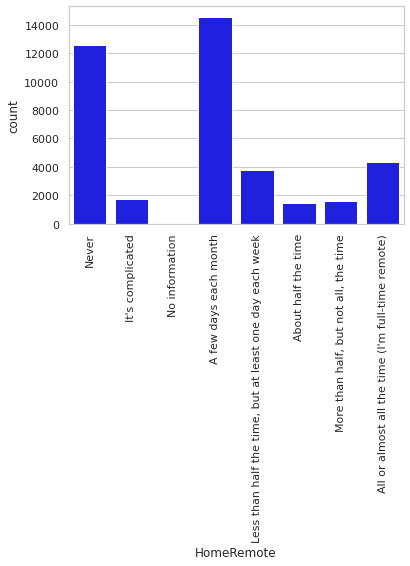

In [21]:
# ... create a bar chart to visualize the frequency of the categories

plot = sns.countplot(x = df_working["HomeRemote"], color='blue', order = homeRemote_cat_strings)
# Set the order manually by providing the string list of the categories
dummy_var = plot.set_xticklabels(labels = homeRemote_cat_strings, rotation=90)

In [22]:
print("Relative distribution of the different categories related to remote work: \n" )
for category in homeRemote_cat_strings:
    percentage_full_remote = df_working.loc[df_working["HomeRemote"] == category]["HomeRemote"].count()/df_working.shape[0]
    print(f"{category}: {round(percentage_full_remote*100,2)}%" )

#print(f"{round(percentage_full_remote*100,2)}% of all employees work completly or almost completly remote")

Relative distribution of the different categories related to remote work: 

Never: 30.51%
It's complicated: 4.16%
No information: 0.0%
A few days each month: 35.34%
Less than half the time, but at least one day each week: 9.17%
About half the time: 3.53%
More than half, but not all, the time: 3.81%
All or almost all the time (I'm full-time remote): 10.48%


As we can see, working remotely or from home is still not common. Most employees never work from home or only for a few days each month. On the other hand, around 10% work fully remote.

Now we are goint to take a look at the coding experience of the different persons:

In [23]:
df_working["YearsCodedJob"].describe()

count            40886
unique              21
top       1 to 2 years
freq              5289
Name: YearsCodedJob, dtype: object

This also seems to be a categorical variable! We look at the frequency of the different provided answers:

In [24]:
pd.set_option('display.max_rows', None)
df_working["YearsCodedJob"].value_counts()

1 to 2 years        5289
2 to 3 years        4765
3 to 4 years        4002
4 to 5 years        3404
20 or more years    3067
Less than a year    3034
5 to 6 years        2990
9 to 10 years       1956
6 to 7 years        1912
10 to 11 years      1678
7 to 8 years        1638
8 to 9 years        1287
15 to 16 years       845
14 to 15 years       840
11 to 12 years       838
12 to 13 years       741
16 to 17 years       694
17 to 18 years       545
13 to 14 years       531
19 to 20 years       427
18 to 19 years       403
Name: YearsCodedJob, dtype: int64

We check again for nan-values

In [25]:
df_working["YearsCodedJob"].isnull().sum()

385

There are around 385 nan values, therefore we are going to drop them

In [26]:
df_working.dropna(subset=["YearsCodedJob"], inplace=True)

This column basically contains numerical values, which are stored as categories. We can convert them to a new integer column "FullYearsCodedJob". Therefore we take the first number in the specified range as the value, 
f.e. "13 to 14 years" gets stored to "13". This is done automatically when we provide the correct semantic order of the categories and then apply them to the column.

In [27]:
# Dict which defines how to map the values from "YearsCodedJob" to "FullYearsCodedJob"
YearsCodedJob_mapping = {"Less than a year" : 0,
                        "1 to 2 years" : 1,
                        "2 to 3 years" : 2,
                        "3 to 4 years" : 3,
                        "4 to 5 years" : 4,
                        "5 to 6 years" : 5,
                        "6 to 7 years" : 6,
                        "7 to 8 years" : 7,
                        "8 to 9 years" : 8,
                        "9 to 10 years" : 9,
                        "10 to 11 years" : 10,
                        "11 to 12 years" : 11,
                        "12 to 13 years" : 12,
                        "13 to 14 years" : 13,
                        "14 to 15 years" : 14,
                        "15 to 16 years" : 15,
                        "16 to 17 years" : 16,
                        "17 to 18 years" : 17,
                        "18 to 19 years" : 18,
                        "19 to 20 years" : 19,
                        "20 or more years" : 20,
                      #  "No information" : 21 # We need to consider that we do not know anything about these persons, therefore we cannot consider this category to be in the same order as the other ones
                        }
# Perform the mapping
df_working["FullYearsCodedJob"] = df_working["YearsCodedJob"].map(YearsCodedJob_mapping)


# Change the original column to a categorical one
YearsCodedJob_cat_strings = ["Less than a year",
                        "1 to 2 years",
                        "2 to 3 years",
                        "3 to 4 years",
                        "4 to 5 years",
                        "5 to 6 years",
                        "6 to 7 years",
                        "7 to 8 years",
                        "8 to 9 years",
                        "9 to 10 years",
                        "10 to 11 years",
                        "11 to 12 years",
                        "12 to 13 years",
                        "13 to 14 years",
                        "14 to 15 years",
                        "15 to 16 years",
                        "16 to 17 years",
                        "17 to 18 years",
                        "18 to 19 years",
                        "19 to 20 years",
                        "20 or more years",
                       # "No information" # We need to consider that we do not know anything about these persons, therefore we cannot consider this category to be in the same order as the other ones
                            ]
YearsCodedJob_cats = CategoricalDtype(categories = YearsCodedJob_cat_strings, ordered = True)

# Converting a column to the "category" datatype
df_working["YearsCodedJob"] = df_working["YearsCodedJob"].astype(YearsCodedJob_cats) 

In [28]:
df_working["YearsCodedJob"].value_counts()

1 to 2 years        5289
2 to 3 years        4765
3 to 4 years        4002
4 to 5 years        3404
20 or more years    3067
Less than a year    3034
5 to 6 years        2990
9 to 10 years       1956
6 to 7 years        1912
10 to 11 years      1678
7 to 8 years        1638
8 to 9 years        1287
15 to 16 years       845
14 to 15 years       840
11 to 12 years       838
12 to 13 years       741
16 to 17 years       694
17 to 18 years       545
13 to 14 years       531
19 to 20 years       427
18 to 19 years       403
Name: YearsCodedJob, dtype: int64

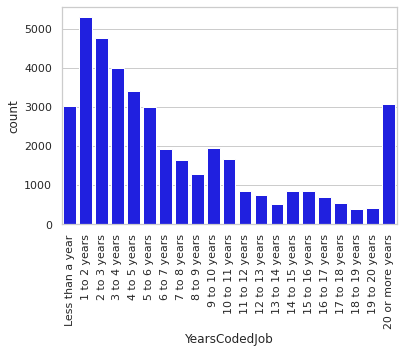

In [29]:
# As earlier, we can create a bar chart to visualize the frequency of the categories

plot = sns.countplot(x = df_working["YearsCodedJob"], color='blue', order = YearsCodedJob_cat_strings)
dummy_variable = plot.set_xticklabels(labels = plot.get_xticklabels(), rotation=90)

The next variable we want to analyze is "YearsCodedJobPast". From the description, we cannot get the difference to the previous column

In [30]:
df_working["YearsCodedJobPast"].describe()

count                 11
unique                 7
top       15 to 16 years
freq                   2
Name: YearsCodedJobPast, dtype: object

In [31]:
df_working["YearsCodedJobPast"].value_counts()

15 to 16 years      2
Less than a year    2
6 to 7 years        2
7 to 8 years        2
11 to 12 years      1
3 to 4 years        1
1 to 2 years        1
Name: YearsCodedJobPast, dtype: int64

In [32]:
df_working["YearsCodedJobPast"].isnull().sum()

40875

In [33]:
df_working["YearsCodedJobPast"].isnull().sum()/df_working.shape[0]

0.9997309592525558

This column mainly contains nan values and the meaning is not described sufficiently, therefore we are going to drop the column

In [34]:
df_working.drop(columns=["YearsCodedJobPast"], axis=1, inplace=True)

Now we want to analyze the average coding experience in a job for each HomeRemote-category. We exclude the employees who selected "It's complicated" regarding their ability to work remotely because we do not know of each of these individuals spends much or less time working remotely

In [35]:
options = ["It's complicated", "No information"]
df_working = df_working.loc[~df_working["HomeRemote"].isin(options)]

In [36]:
df_working["HomeRemote"] = df_working["HomeRemote"].cat.remove_unused_categories().copy()
average_work_experience = df_working.groupby("HomeRemote").mean()["FullYearsCodedJob"]
average_work_experience

HomeRemote
Never                                                      5.346656
A few days each month                                      6.656060
Less than half the time, but at least one day each week    7.504255
About half the time                                        7.155387
More than half, but not all, the time                      7.440438
All or almost all the time (I'm full-time remote)          8.758283
Name: FullYearsCodedJob, dtype: float64

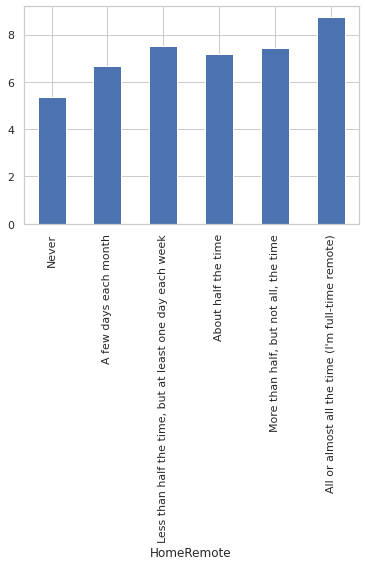

In [37]:
plt = average_work_experience.plot(kind="bar")

As we can see, there seems to be a general trend indicating that employees with more working experience are more likely to work remotely than employees with less working experience.

# Questions 2 - Is a smaller or a bigger company more likely to offer remote jobs?
To answer this question, we need to take a look at the different company sizes in which the survey participants work. To only use the data from people who are currently working, we use our cleaned and preprocessed dataset from the first question.

In [38]:
df_working.head()

,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,CompanyType,...,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary,FullYearsCodedJob
2,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",Publicly-traded corporation,...,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN,20
3,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",Non-profit/non-governmental organization or pr...,...,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN,9
4,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,"Privately-held limited company, not in startup...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10
6,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Master's degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...",20 to 99 employees,Government agency or public school/university,...,Male,A doctoral degree,White or of European descent,Disagree,Agree,Disagree,Agree,NaN,NaN,8
7,Professional developer,"Yes, both",Poland,No,Employed full-time,Master's degree,Computer science or software engineering,All or almost all the time (I'm full-time remote),Fewer than 10 employees,Pre-series A startup,...,Male,A master's degree,White or of European descent,Agree,Somewhat agree,Disagree,Agree,NaN,NaN,7


To answer this question, we are going to look at the "CompanySize" and "CompanyType"

In [39]:
df_working["CompanySize"].value_counts()

20 to 99 employees          7622
100 to 499 employees        6477
10,000 or more employees    4953
10 to 19 employees          3545
1,000 to 4,999 employees    3347
Fewer than 10 employees     3274
500 to 999 employees        2187
5,000 to 9,999 employees    1405
I don't know                 608
I prefer not to answer       520
Name: CompanySize, dtype: int64

In [40]:
df_working["CompanySize"].isnull().sum()

5248

Again we create a categorical variable from the data

In [41]:
df_working["CompanySize"].fillna("No data", inplace=True)
# Change the original column to a categorical one
CompanySize_cat_strings = ["Fewer than 10 employees",
                        "20 to 99 employees",
                        "100 to 499 employees",
                        "500 to 999 employees",
                        "1,000 to 4,999 employees",
                        "5,000 to 9,999 employees",
                        "10,000 or more employees",
                        "I don't know",
                        "I prefer not to answer",
                        "No data",
                            ]
CompanySize_cats = CategoricalDtype(categories = CompanySize_cat_strings, ordered = True)

# Converting a column to the "category" datatype
df_working["CompanySize"] = df_working["CompanySize"].astype(CompanySize_cats) 

In [42]:
df_working["CompanySize"].value_counts()

20 to 99 employees          7622
100 to 499 employees        6477
No data                     5248
10,000 or more employees    4953
1,000 to 4,999 employees    3347
Fewer than 10 employees     3274
500 to 999 employees        2187
5,000 to 9,999 employees    1405
I don't know                 608
I prefer not to answer       520
Name: CompanySize, dtype: int64

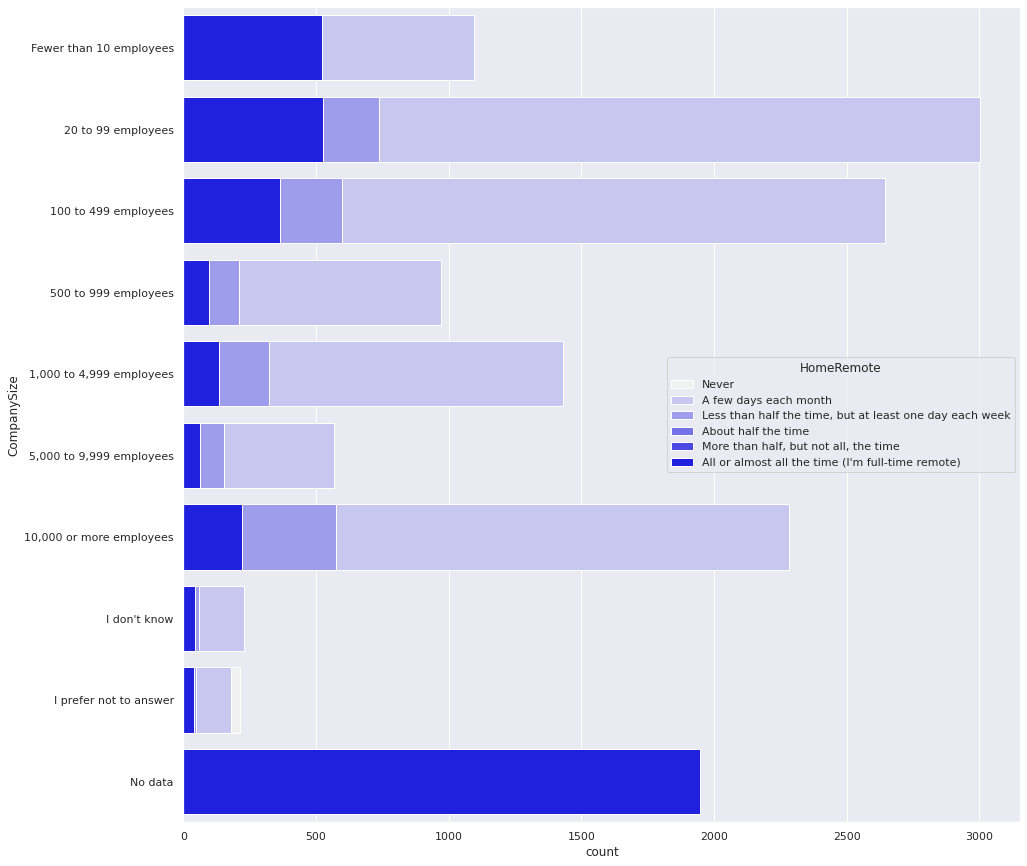

In [43]:
sns.set(rc={'figure.figsize':(15, 15)})
ax = sns.countplot(y = df_working["CompanySize"], hue = df_working["HomeRemote"], color='blue', dodge=False, orient="v",   order = CompanySize_cat_strings)

In this plot, we can only the the absolute values. These are more difficult to compare. Therefore we are going to create a plot with the relative values

In [44]:
df_working["CompanySize"].value_counts()

20 to 99 employees          7622
100 to 499 employees        6477
No data                     5248
10,000 or more employees    4953
1,000 to 4,999 employees    3347
Fewer than 10 employees     3274
500 to 999 employees        2187
5,000 to 9,999 employees    1405
I don't know                 608
I prefer not to answer       520
Name: CompanySize, dtype: int64

In [45]:
abs_remote_size_stats = df_working.groupby("CompanySize")["HomeRemote"].value_counts()
rel_remote_size_stats = abs_remote_size_stats / abs_remote_size_stats.groupby("CompanySize").sum()*100

In [46]:
rel_remote_size_stats

CompanySize               HomeRemote                                             
Fewer than 10 employees   A few days each month                                      33.506573
                          Never                                                      28.890248
                          All or almost all the time (I'm full-time remote)          15.988994
                          Less than half the time, but at least one day each week    10.852950
                          More than half, but not all, the time                       5.716906
                          About half the time                                         5.044329
20 to 99 employees        A few days each month                                      39.438099
                          Never                                                      38.217146
                          Less than half the time, but at least one day each week     9.701982
                          All or almost all the time (I'm full-

In [47]:
rel_remote_size_stats_df = pd.DataFrame(rel_remote_size_stats).unstack()

In [48]:
rel_remote_size_stats_df.dtypes

            HomeRemote                                             
HomeRemote  Never                                                      float64
            A few days each month                                      float64
            Less than half the time, but at least one day each week    float64
            About half the time                                        float64
            More than half, but not all, the time                      float64
            All or almost all the time (I'm full-time remote)          float64
dtype: object

In [49]:
#ax = sns.countplot(data = rel_remote_size_stats_df, color='blue', dodge=False, orient="v",   order = CompanySize_cat_strings)
# y = rel_remote_size_stats_df["CompanySize"], hue = rel_remote_size_stats_df["HomeRemote"],

# Question 3 - What are the most common ways for companies to search for remote workforce?

To answer these questions, the following columns are most important! As earlier, we can only use the data from individuales who are employed currently.

JobSeekingStatus - Which of the following best describes your current job-seeking status?

AssessJobRemote - When you're assessing potential jobs to apply to, how important are each of the following to you? The opportunity to work from home/remotely

LearnedHiring	Think back to when you first applied to work for your current employer. Which of the following best describes how you learned that they were hiring for that particular job?

In [50]:
df_working.head()

,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,CompanyType,...,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary,FullYearsCodedJob
2,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",Publicly-traded corporation,...,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN,20
3,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",Non-profit/non-governmental organization or pr...,...,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN,9
4,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,NaN,"Privately-held limited company, not in startup...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10
6,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Master's degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...",20 to 99 employees,Government agency or public school/university,...,Male,A doctoral degree,White or of European descent,Disagree,Agree,Disagree,Agree,NaN,NaN,8
7,Professional developer,"Yes, both",Poland,No,Employed full-time,Master's degree,Computer science or software engineering,All or almost all the time (I'm full-time remote),Fewer than 10 employees,Pre-series A startup,...,Male,A master's degree,White or of European descent,Agree,Somewhat agree,Disagree,Agree,NaN,NaN,7


In [51]:
df_working["JobSeekingStatus"].value_counts()

I'm not actively looking, but I am open to new opportunities    16288
I am not interested in new job opportunities                     6592
I am actively looking for a job                                  3071
Name: JobSeekingStatus, dtype: int64

In [52]:
df_working["AssessJobRemote"].value_counts()

Important               4797
Somewhat important      4774
Very important          3887
Not very important      3045
Not at all important     795
Name: AssessJobRemote, dtype: int64

In [53]:
df_working["LearnedHiring"].value_counts()

A friend, family member, or former colleague told me                            5577
I was contacted directly by someone at the company (e.g. internal recruiter)    3803
A general-purpose job board                                                     2957
An external recruiter or headhunter                                             2896
I visited the company's Web site and found a job listing there                  1727
A career fair or on-campus recruiting event                                     1551
Some other way                                                                  1500
A tech-specific job board                                                        868
Name: LearnedHiring, dtype: int64

We want to compare employees who do not work remotely and people who work remotely a lot ("More than half, but not all, the time" or "All or almost all the time (I'm full-time remote)") regarding how they learned that their current emplooyer is hiring for their current position

In [54]:
options = ["More than half, but not all, the time", "All or almost all the time (I'm full-time remote)"]
df_remote = df_working.loc[df_working["HomeRemote"].isin(options)]

In [55]:
df_remote["LearnedHiring"].value_counts()

A friend, family member, or former colleague told me                            584
I was contacted directly by someone at the company (e.g. internal recruiter)    513
A general-purpose job board                                                     204
Some other way                                                                  203
An external recruiter or headhunter                                             195
I visited the company's Web site and found a job listing there                  151
A tech-specific job board                                                       134
A career fair or on-campus recruiting event                                      79
Name: LearnedHiring, dtype: int64

In [56]:
# Percentages
df_working["LearnedHiring"].value_counts() / df_working["LearnedHiring"].count()

A friend, family member, or former colleague told me                            0.267110
I was contacted directly by someone at the company (e.g. internal recruiter)    0.182145
A general-purpose job board                                                     0.141626
An external recruiter or headhunter                                             0.138704
I visited the company's Web site and found a job listing there                  0.082715
A career fair or on-campus recruiting event                                     0.074285
Some other way                                                                  0.071843
A tech-specific job board                                                       0.041573
Name: LearnedHiring, dtype: float64

In [57]:
df_remote["LearnedHiring"].value_counts() / df_remote["LearnedHiring"].count()

A friend, family member, or former colleague told me                            0.283083
I was contacted directly by someone at the company (e.g. internal recruiter)    0.248667
A general-purpose job board                                                     0.098885
Some other way                                                                  0.098400
An external recruiter or headhunter                                             0.094523
I visited the company's Web site and found a job listing there                  0.073194
A tech-specific job board                                                       0.064954
A career fair or on-campus recruiting event                                     0.038294
Name: LearnedHiring, dtype: float64

In [58]:
# Create a new column with a boolean value that indicates remote work based on our criterias or not
options = ["More than half, but not all, the time", "All or almost all the time (I'm full-time remote)"]
df_working["Remote"] = df_working["HomeRemote"].isin(options)

In [59]:
df_working["Remote"].head()

2    False
3    False
4    False
6    False
7     True
Name: Remote, dtype: bool

In [71]:
# Before evaluating, we take a look how many values are missing
df_working["LearnedHiring"].isna().value_counts()

False    20879
True     18307
Name: LearnedHiring, dtype: int64

In [81]:
# As we can see, nearly half of the data is missing! This will make a prediction based on this data diffcult. Neithertheless, we are going to proceed and drop the na-data.
df_working.dropna(subset=["LearnedHiring"], inplace=True)

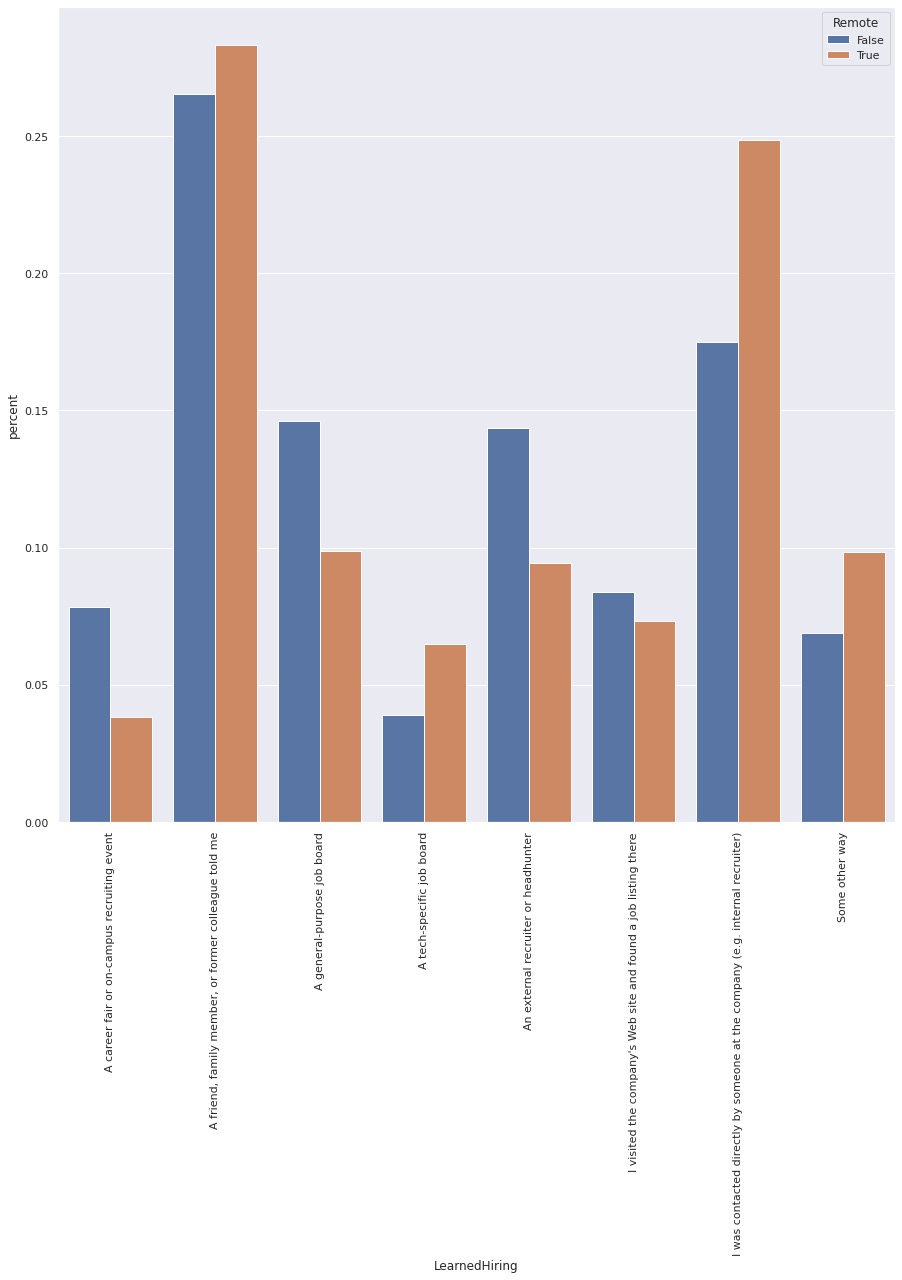

In [83]:
new_df = (df_working.groupby(['LearnedHiring','Remote']).size() / df_working.groupby(['Remote']).size()).reset_index().rename({0:'percent'}, axis=1)
plot = sns.barplot(x=new_df["LearnedHiring"], y = new_df["percent"], hue=new_df["Remote"])
dummy_variable = plot.set_xticklabels(labels = plot.get_xticklabels(), rotation=90)

As we can see, many remote employees were contacted directly by f.e. an internal recruiter of their current employer compared to non-remote employees. Tech-specific job boards are also more common for remote employees to find a remote job. On the other hand, career fairs, general-purpose job boards and external recruiters are options less preferable for people who want to work remotely.

We can conclude that a person who wants to work remotely should focus on self-promotion to get recognized by companies which search for remote workforce. This could be done by creating a expressive profile on LinkedIn or being active on websites like Medium, StackOverFlow or Kaggle. Additionally, searching for jobs in specialized job boards could be an option.